In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
#Read data
data = pd.read_excel('HR+Diversity+problem.xlsx')
data.head()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           259 non-null    object
 1   RaceDesc         259 non-null    object
 2   Position         259 non-null    object
 3   MaritalDesc      259 non-null    object
 4   Department       259 non-null    object
 5   EmpSatisfaction  259 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 12.3+ KB


In [4]:
# Importing Categorical Columns
data_cat = data[['Gender','RaceDesc','Position','MaritalDesc','Department','EmpSatisfaction']]
# Converting satisfaction into categorical variable.
data_cat['EmpSatisfaction'] = data_cat['EmpSatisfaction'].astype('object',copy=False)

In [5]:
data_cat.info() #Finding the shape, checking for null values, DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           259 non-null    object
 1   RaceDesc         259 non-null    object
 2   Position         259 non-null    object
 3   MaritalDesc      259 non-null    object
 4   Department       259 non-null    object
 5   EmpSatisfaction  259 non-null    object
dtypes: object(6)
memory usage: 12.3+ KB


In [6]:
data_cat.isnull().sum()

Gender             0
RaceDesc           0
Position           0
MaritalDesc        0
Department         0
EmpSatisfaction    0
dtype: int64

In [7]:
data_cat.head()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


In [8]:
data_cat['Department'].value_counts()

Production              201
Sales                    26
IT/IS                    23
Software Engineering      9
Name: Department, dtype: int64

In [9]:
data_cat['Department'].value_counts(normalize=True)*100

Production              77.606178
Sales                   10.038610
IT/IS                    8.880309
Software Engineering     3.474903
Name: Department, dtype: float64

Text(0.5, 0, '% of Employees')

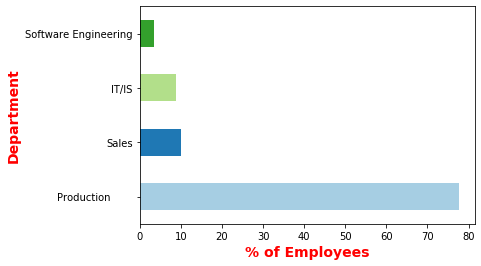

In [10]:
(data_cat['Department'].value_counts(normalize=True)*100).plot(kind='barh',color=plt.cm.Paired(np.arange(len(data_cat))))
plt.ylabel('Department', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('% of Employees', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')

In [11]:
data_cat.RaceDesc.unique()

array(['White', 'Two or more races', 'Asian', 'Black or African American'],
      dtype=object)

In [28]:
departmentWRTDiversity = data_cat.groupby(['RaceDesc']).Department.value_counts().unstack()
departmentWRTDiversity

Department,IT/IS,Production,Sales,Software Engineering
RaceDesc,,,,
Asian,3.0,22.0,1.0,2.0
Black or African American,2.0,31.0,8.0,3.0
Two or more races,1.0,10.0,6.0,NaN
White,17.0,138.0,11.0,4.0


In [29]:
deptWisePctDiversity = (round(data_cat.groupby(['RaceDesc']).Department.value_counts(normalize=True)*100)).unstack()
deptWisePctDiversity

Department,IT/IS,Production,Sales,Software Engineering
RaceDesc,,,,
Asian,11.0,79.0,4.0,7.0
Black or African American,5.0,70.0,18.0,7.0
Two or more races,6.0,59.0,35.0,NaN
White,10.0,81.0,6.0,2.0


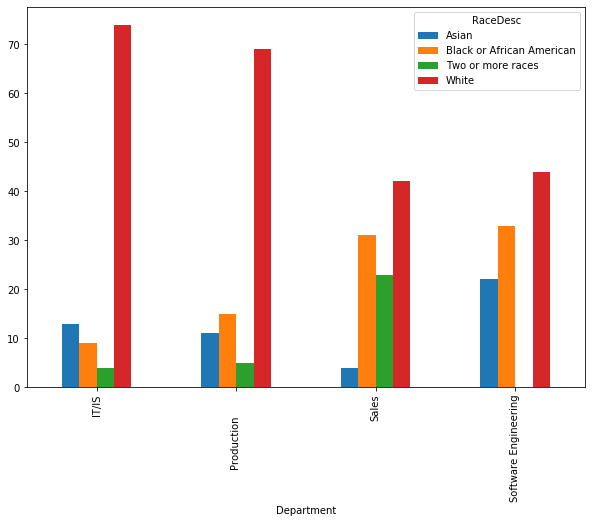

In [14]:

fig, ax = plt.subplots(figsize=(10,7))

deptWisePctDiversity.plot.bar(ax=ax)

# Question 1

#### Analyse the different departments within the company and the diversity in them with respect to different races. 
#### Which race has been the most abundant in the company? Which department has low diversity? 
#### Summarise the insights derived and prospective actionables for the HR department on the basis of those insights. 

# Question 2
### Analyse the distribution of people based on gender across the different positions of the company. Which position has the highest female to male ratio and which position has a ratio nearing 1? Summarise the insights derived and prospective actionables for the HR department on the basis of those insights. (10 Marks)


In [15]:
data_cat.head()


,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


In [16]:
data_cat['Position'].value_counts()

Production Technician I     134
Production Technician II     54
Area Sales Manager           26
Production Manager           13
Software Engineer             9
IT Support                    8
Database Administrator        5
Network Engineer              5
Sr. Network Engineer          5
Name: Position, dtype: int64

In [17]:
round(data_cat['Position'].value_counts(normalize = True)*100)

Production Technician I     52.0
Production Technician II    21.0
Area Sales Manager          10.0
Production Manager           5.0
Software Engineer            3.0
IT Support                   3.0
Database Administrator       2.0
Network Engineer             2.0
Sr. Network Engineer         2.0
Name: Position, dtype: float64

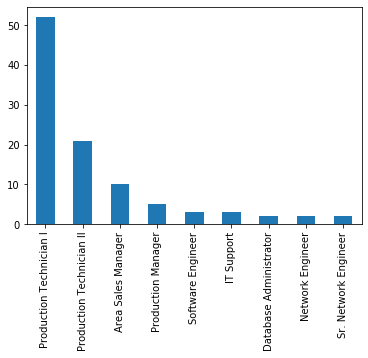

In [18]:
round(data_cat['Position'].value_counts(normalize = True)*100).plot.bar() 

In [19]:
data_cat.Gender.unique()

array(['M ', 'F'], dtype=object)

In [20]:
data_cat['Gender'] = data_cat['Gender'].str.strip()

In [21]:
data_cat['Gender'].value_counts()

F    154
M    105
Name: Gender, dtype: int64

In [22]:
round(data_cat['Gender'].value_counts(normalize = True)*100)

F    59.0
M    41.0
Name: Gender, dtype: float64

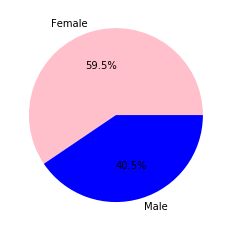

In [23]:
colors = ['Pink', 'Blue']
labels = ['Female','Male']
plt.pie(data_cat.Gender.value_counts(normalize=True), labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

In [24]:
GenderWRTPos = data_cat.groupby(['Gender']).Position.value_counts().unstack()
GenderWRTPos

Position,Area Sales Manager,Database Administrator,IT Support,Network Engineer,Production Manager,Production Technician I,Production Technician II,Software Engineer,Sr. Network Engineer
Gender,,,,,,,,,
F,12,4,5,2,6,82,35,6,2
M,14,1,3,3,7,52,19,3,3


In [25]:
positionsWRTGender = data_cat.groupby(['Position']).Gender.value_counts().unstack()
positionsWRTGender

Gender,F,M
Position,,
Area Sales Manager,12,14
Database Administrator,4,1
IT Support,5,3
Network Engineer,2,3
Production Manager,6,7
Production Technician I,82,52
Production Technician II,35,19
Software Engineer,6,3
Sr. Network Engineer,2,3


In [26]:
type(positionsWRTGender)

pandas.core.frame.DataFrame

In [27]:
positionsWRTGender['FemaleToMaleRatio'] = positionsWRTGender.apply(lambda row: row['F']/row['M'], axis=1) 
positionsWRTGender

Gender,F,M,FemaleToMaleRatio
Position,,,
Area Sales Manager,12,14,0.857143
Database Administrator,4,1,4.000000
IT Support,5,3,1.666667
Network Engineer,2,3,0.666667
Production Manager,6,7,0.857143
Production Technician I,82,52,1.576923
Production Technician II,35,19,1.842105
Software Engineer,6,3,2.000000
Sr. Network Engineer,2,3,0.666667
